# Movie Recommendation System

<img src='cover.jpg'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [2]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits_df.shape

(4803, 4)

In [6]:
movies_df.shape

(4803, 20)

### Cleaning the Data

After going through the dataset, we notice that few columns like ```genres, keywords, production_companies, production_countries, spoken_languages ``` are in JSON format so we carry out the next process to get it into a string format which can be easy to read

In [7]:
# converting the genres column from JSON format to string
movies_df["genres"]=movies_df["genres"].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['genres']):
    l1=[]
    for j in range(len(i)):
        l1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies_df.loc[index,'genres']=str(l1)

In [8]:
# converting the keywords column
movies_df['keywords']=movies_df['keywords'].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['keywords']):
    l2=[]
    for j in range(len(i)):
        l2.append((i[j]['name']))
    movies_df.loc[index,'keywords']=str(l2)

In [9]:
## converting the production_companies column
movies_df['production_companies']=movies_df['production_companies'].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['production_companies']):
    l3=[]
    for j in range(len(i)):
        l3.append((i[j]['name']))
    movies_df.loc[index,'production_companies']=str(l3)

In [10]:
# converting the production_countries column 
movies_df['production_countries']=movies_df['production_countries'].apply(json.loads)
for index,i in zip(movies_df.index,movies_df['production_countries']):
    l4=[]
    for j in range(len(i)):
        l4.append((i[j]['name']))
    movies_df.loc[index,'production_countries']=str(l4)

Same way, we are converting the format from JSON to string in Credits dataset

In [11]:
# converting the cast column
credits_df['cast']=credits_df['cast'].apply(json.loads)
for index,i in zip(credits_df.index,credits_df['cast']):
    l5=[]
    for j in range(len(i)):
        l5.append((i[j]['name']))
    credits_df.loc[index,'cast']=str(l5)

In [12]:
# converting the crew column from json to string    
credits_df['crew']=credits_df['crew'].apply(json.loads)
def director_name(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits_df['crew']=credits_df['crew'].apply(director_name)
credits_df.rename(columns={'crew':'director'},inplace=True)

Now we merge both the tables as one.

In [284]:
df = movies_df.merge(credits_df,left_on='id',right_on='movie_id',how='left')

In [285]:
df.shape

(4803, 24)

In [286]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'director'],
      dtype='object')

Converting the string data into a list since there are multiple values associated with a single movie

In [287]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

df['keywords']=df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['keywords']=df['keywords'].str.split(',')

df['production_companies']=df['production_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['production_companies']=df['production_companies'].str.split(',')

df['production_countries']=df['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['production_countries']=df['production_countries'].str.split(',')

df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast']=df['cast'].str.split(',')

df['director']=df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['director']=df['director'].str.split(',')

*** Checking for missing values ***

In [288]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
director                  30
dtype: int64

*** Replacing Null value with blank value ***

In [289]:
df['homepage'].fillna('missing',inplace = True)
df['overview'].fillna('missing',inplace = True)
df.drop([2656,4140,4553],inplace=True)#three rows contain many NaN values
df['tagline'].fillna('missing',inplace = True)
df['director'].fillna('missing',inplace = True)
df.reset_index(drop=True,inplace=True)

In [290]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
movie_id                0
title_y                 0
cast                    0
director                0
dtype: int64

In [291]:
df.shape

(4800, 24)

*** Replacing String categories with numbers ***

In [292]:
#Define some key features:
l_genres = [] #genres category list
l_keywords = [] #keywords category list
l_production_companies = [] #production_companies category list
l_production_countries = [] #production_countries category list
l_cast = [] #cast category list
l_director = [] #director category list

In [293]:
i = 0;
for s in df['original_language'].unique():
    df['original_language'].replace(s, i, inplace=True)
    i+=1
i = 0;
for s in df['status'].unique():
    df['status'].replace(s, i, inplace=True)
    i+=1
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar, spacecolony, ...",0,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland, eastindiatrad...",0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",0,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",0,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist, secretiden...",0,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,260000000,"[Action, Adventure, ScienceFiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion, spacetravel, p...",0,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]
5,258000000,"[Fantasy, Action, Adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[dualidentity, amnesia, sandstorm, ""loveofones...",0,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[ColumbiaPictures, LauraZiskinProductions, Mar...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,"[TobeyMaguire, KirstenDunst, JamesFranco, Thom...",[SamRaimi]
6,260000000,"[Animation, Family]",http://disney.go.com/disneypictures/tangled/,38757,"[hostage, magic, horse, fairytale, musical, pr...",0,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[WaltDisneyPictures, WaltDisneyAnimationStudios]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,Tangled,"[ZacharyLevi, MandyMoore, DonnaMurphy, RonPerl...",[ByronHoward]
7,280000000,"[Action, Adventure, ScienceFiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvelcomic, sequel, superhero, basedoncomicb...",0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[MarvelStudios, PrimeFocus, RevolutionSunStudios]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,99861,Avengers: Age of Ultron,"[RobertDowneyJr., ChrisHemsworth, MarkRuffalo,

In [294]:
#convert genres list to numeric values
i = 0
l1 = []
for l in df['genres']:
    l1+=l
l_genres = {}.fromkeys(l1).keys()
for l in df['genres']:
    s_g = ''
    for s in l_genres:
        if s in l:
            s_g+='1'
        else:
            s_g+='0'
    df.loc[i,'genres'] = s_g
    i+=1
df['genres'].unique()
i = 0;
for s in df['genres'].unique():
    df['genres'].replace(s, i, inplace=True)
    i+=1

In [295]:
#convert keywords list to numeric values
i = 0
l1 = []
for l in df['keywords']:
    l1+=l
l_keywords = {}.fromkeys(l1).keys()
for l in df['keywords']:
    s_g = ''
    for s in l_keywords:
        if s in l:
            s_g+='1'
        else:
            s_g+='0'
    df.loc[i,'keywords'] = s_g
    i+=1
df['keywords'].unique()
i = 0;
for s in df['keywords'].unique():
    df['keywords'].replace(s, i, inplace=True)
    i+=1

In [296]:
#convert production_companies list to numeric values
i = 0
l1 = []
for l in df['production_companies']:
    l1+=l
l_production_companies = {}.fromkeys(l1).keys()
for l in df['production_companies']:
    s_g = ''
    for s in l_production_companies:
        if s in l:
            s_g+='1'
        else:
            s_g+='0'
    df.loc[i,'production_companies'] = s_g
    i+=1
df['production_companies'].unique()
i = 0;
for s in df['production_companies'].unique():
    df['production_companies'].replace(s, i, inplace=True)
    i+=1

In [297]:
#convert production_countries list to numeric values
i = 0
l1 = []
for l in df['production_countries']:
    l1+=l
l_production_countries = {}.fromkeys(l1).keys()
for l in df['production_countries']:
    s_g = ''
    for s in l_production_countries:
        if s in l:
            s_g+='1'
        else:
            s_g+='0'
    df.loc[i,'production_countries'] = s_g
    i+=1
df['production_countries'].unique()
i = 0;
for s in df['production_countries'].unique():
    df['production_countries'].replace(s, i, inplace=True)
    i+=1

In [298]:
#convert cast list to numeric values
i = 0
l1 = []
for l in df['cast']:
    l1+=l
l_cast = {}.fromkeys(l1).keys()
for l in df['cast']:
    s_g = ''
    for s in l_cast:
        if s in l:
            s_g+='1'
        else:
            s_g+='0'
    df.loc[i,'cast'] = s_g
    i+=1
df['cast'].unique()
i = 0;
for s in df['cast'].unique():
    df['cast'].replace(s, i, inplace=True)
    i+=1

In [299]:
#convert director list to numeric values
i = 0
l1 = []
for l in df['director']:
    l1+=l
l_director = {}.fromkeys(l1).keys()
for l in df['director']:
    s_g = ''
    for s in l_director:
        if s in l:
            s_g+='1'
        else:
            s_g+='0'
    df.loc[i,'director'] = s_g
    i+=1
df['director'].unique()
i = 0;
for s in df['director'].unique():
    df['director'].replace(s, i, inplace=True)
    i+=1

In [300]:
# for i in range(len(df['budget'])):
#     df.loc[i,'homepage'] = hash(df.loc[i,'homepage'])/1000000000000000
#     df.loc[i,'original_title'] = hash(df.loc[i,'original_title'])/1000000000000000
#     df.loc[i,'title_x'] = hash(df.loc[i,'title_x'])/1000000000000000
#     df.loc[i,'title_y'] = hash(df.loc[i,'title_y'])/1000000000000000
#     df.loc[i,'overview'] = hash(df.loc[i,'overview'])/1000000000000000
#     df.loc[i,'tagline'] = hash(df.loc[i,'tagline'])/1000000000000000
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,0,http://www.avatarmovie.com/,19995,0,0,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,0,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,0,0
1,300000000,1,http://disney.go.com/disneypictures/pirates/,285,1,0,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,1,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,1,1
2,245000000,2,http://www.sonypictures.com/movies/spectre/,206647,2,0,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",0,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,2,2
3,250000000,3,http://www.thedarkknightrises.com/,49026,3,0,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,3,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,3,3
4,260000000,4,http://movies.disney.com/john-carter,49529,4,0,John Carter,"John Carter is a war-weary, former military ca...",43.926995,4,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,4,4
5,258000000,1,http://www.sonypictures.com/movies/spider-man3/,559,5,0,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,5,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,5,5
6,260000000,5,http://disney.go.com/disneypictures/tangled/,38757,6,0,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,6,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,Tangled,6,6
7,280000000,4,http://marvel.com/movies/movie/193/avengers_ag...,99861,7,0,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,7,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,99861,Avengers: Age of Ultron,7,7
8,250000000,6,http://harrypotter.warnerbros.com/harrypottera...,767,8,0,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,8,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,767,Harry Potter and the Half-Blood Prince,8,8
9,250000000,1,http://www.batmanvsupermandawnofjustice.com/,209112,9,0,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,9,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,209112,Batman v Superman: Dawn of Justice,9,9


*** Drop duplicate columns, check correlation matrix ***

In [301]:
df.drop(['spoken_languages'],axis=1,inplace=True)
#so far, everythings are numeric

In [302]:
df.corr()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,revenue,runtime,status,vote_average,vote_count,movie_id,cast,director
budget,1.000000,-0.321484,-0.088345,-0.595984,-0.102383,0.505297,-0.605075,-0.186930,0.730781,0.269792,-0.027643,0.092224,0.593102,-0.088345,-0.761794,-0.570087
genres,-0.321484,1.000000,0.060764,0.201887,0.027103,-0.204348,0.231624,0.096962,-0.261656,-0.143554,0.002589,-0.096783,-0.228830,0.060764,0.303845,0.268772
id,-0.088345,0.060764,1.000000,-0.004039,0.054628,0.032997,0.155555,0.099355,-0.049436,-0.150497,0.019075,-0.265399,-0.002785,1.000000,0.170371,0.272336
keywords,-0.595984,0.201887,-0.004039,1.000000,0.112572,-0.261827,0.649964,0.167970,-0.397823,-0.135862,0.003269,0.107229,-0.306126,-0.004039,0.734712,0.495557
original_language,-0.102383,0.027103,0.054628,0.112572,1.000000,-0.063632,0.162466,0.465767,-0.076835,0.038797,0.014243,0.054410,-0.066089,0.054628,0.154944,0.154086
popularity,0.505297,-0.204348,0.032997,-0.261827,-0.063632,1.000000,-0.291061,-0.118402,0.644654,0.225372,-0.026098,0.274212,0.778081,0.032997,-0.410683,-0.384043
production_companies,-0.605075,0.231624,0.155555,0.649964,0.162466,-0.291061,1.000000,0.252436,-0.424594,-0.188067,0.003207,0.008184,-0.329646,0.155555,0.752300,0.566404
production_countries,-0.186930,0.096962,0.099355,0.167970,0.465767,-0.118402,0.252436,1.000000,-0.156169,0.000256,-0.001660,0.035143,-0.129688,0.099355,0.226718,0.222716
revenue,0.730781,-0.261656,-0.049436,-0.397823,-0.076835,0.644654,-0.424594,-0.156169,1.000000,0.251188,-0.019772,0.197291,0.781450,-0.049436,-0.522061,-0.427315
runtime,0.269792,-0.143554,-0.150497,-0.135862,0.038797,0.225372,-0.188067,0.000256,0.251188,1.000000,-0.045752,0.371888,0.272036,-0.150497,-0.298570,-0.313294


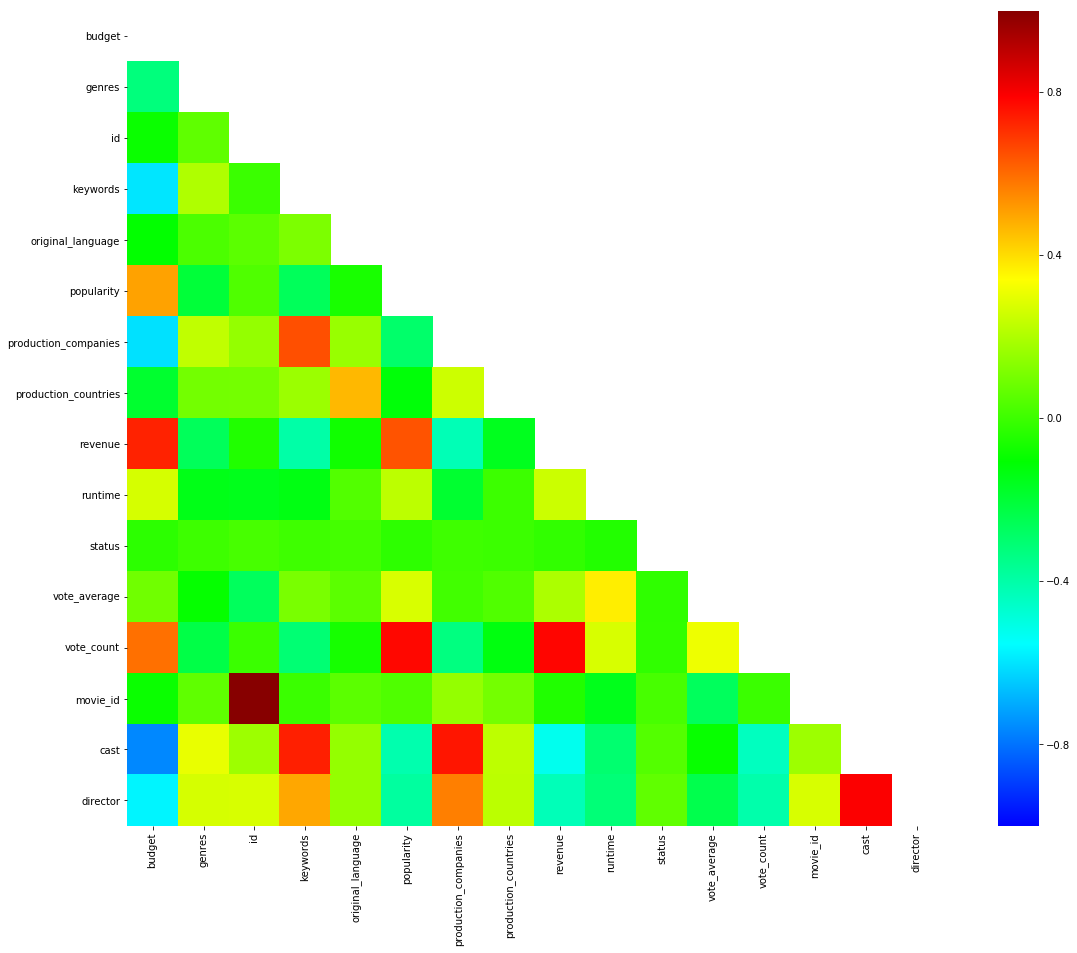

In [303]:
corr = df.corr()
rgbmap = []
for i in range(254):
    strs = "#00"
    if i-15<0: 
        strs += "0"
        strs += hex(i+1)[2:]
    else : strs+=(hex(i+1)[2:])
    strs += "FF"
    rgbmap+=[strs]
for i in range(254):
    strs = "#00FF"
    if 255-i<16: 
        strs += "0"
        strs += hex(255-i)[2:]
    else : strs+=(hex(255-i)[2:])
    rgbmap+=[strs]
for i in range(254):
    strs = "#"
    if i-16<0: 
        strs += "0"
        strs += hex(i)[2:]
    else : strs+=(hex(i)[2:])
    strs += "FF00"
    rgbmap+=[strs]
for i in range(255):
    strs = "#FF"
    if 255-i<16: 
        strs += "0"
        strs += hex(255-i)[2:]
    else : strs+=(hex(255-i)[2:])
    strs += "00"
    rgbmap+=[strs]
for i in range(120):
    strs = "#"
    strs+=(hex(254-i)[2:])
    strs+="0000"
    rgbmap+=[strs]
plt.figure(figsize=(20,15))
cmap = sns.color_palette(rgbmap)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,vmax=1,vmin=-1,xticklabels=True, yticklabels=True,cmap=cmap,square=True)

In the heatmap shown above, we can visually find out that vote_count, popularity, budget and revenue are highly correlated. This makes sense(which is obviously). Some other features like vote_average and runtime have some influence on those key features. Unfortunately, there is no feature that is highly uncorraleted with others. Instead, title only correlates to title-like features, and homepage does seldom relate to other features.

*** Regression analysis ***

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

First, we choose all the numeric features except vote_average, vote_count and popularity because vote_count and popularity can only be known after movie released but they do have big deal with revenue.

In [309]:
model = LinearRegression(fit_intercept=True)
movies = df[['budget','genres','id','keywords','original_language','production_companies','production_countries','runtime','status','cast','director']]
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(movies, y, random_state=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
model.coef_

array([ 3.16699836e+00, -3.28986587e+04,  5.97882899e+01,  1.98500140e+03,
        1.19223686e+05, -3.92315567e+03, -6.35025578e+04,  4.33411174e+05,
        6.02913726e+06,  2.23964606e+04, -2.27863254e+04])

In [310]:
print("R^2: %s" % model.score(X_test,y_test))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("MSE: %s" % mean_squared_error(y_test, y_model))
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("MAE: %s" % mean_absolute_error(y_test, y_model))

R^2: 0.5638399726666441
MSE: 1.1887175213092894e+16
MAE: 57435498.870974526


In [311]:
#According to the analysis above, 

model = LinearRegression(fit_intercept=True)
movies = df[['runtime','budget','id','original_language','production_companies']]
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(movies, y, random_state=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
model.coef_

array([ 4.33121973e+05,  2.95116761e+00,  3.98265930e+01, -5.24733454e+05,
        4.51960960e+03])

In [312]:
print("R^2: %s" % model.score(X_test,y_test))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("MSE: %s" % mean_squared_error(y_test, y_model))
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("MAE: %s" % mean_absolute_error(y_test, y_model))

R^2: 0.5543634262987502
MSE: 1.2145450524975282e+16
MAE: 57120332.577056706


In [313]:
#These values are incredably large, try to remove 0 values and see if we can figure it out.
movies = df[['runtime','budget','id','original_language','production_companies']][df['revenue']>0]
y = df['revenue'][df['revenue']>0]
X_train, X_test, y_train, y_test = train_test_split(movies, y, random_state=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
model.coef_

array([ 5.99238136e+05,  3.01892904e+00,  5.22865477e+01, -1.03710702e+06,
        8.96967901e+03])

In [314]:
print("R^2: %s" % model.score(X_test,y_test))
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print("MSE: %s" % mean_squared_error(y_test, y_model))
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("MAE: %s" % mean_absolute_error(y_test, y_model))

R^2: 0.49717152438451506
MSE: 1.8070562945103172e+16
MAE: 77694898.58475749


Obviously, linear regression is not suitable for this dataset. Let's go for polynomial regression.